# Part 1 - Web-Scraping Mars News

In [1]:
# Import Splinter and BeautifulSoup
from splinter import Browser
from bs4 import BeautifulSoup as bs
from webdriver_manager.chrome import ChromeDriverManager
import requests
import matplotlib.pyplot as plt
import pandas as pd


In [44]:
# Install ChromeDriver and initialize the browser with given executable_path; set headless mode to False for visible browsing
executable_path = {'executable_path': ChromeDriverManager().install()}
browser = Browser('chrome', **executable_path, headless=False)

In [ ]:
# Visit the Mars NASA news site: 
url = 'https://redplanetscience.com'
browser.visit(url)

In [4]:
# Extract text elements for article title and teaser text
html = browser.html
# Creating BeautifulSoup object
soup = bs(html, 'html.parser')

In [5]:
# Find all 'div' elements with the class 'list_text' and store them in the all_stories variable
all_stories = soup.find_all('div', class_="list_text")

In [6]:
# Create an empty list to store the dictionaries
stories = []
# Loop through the text elements
for story in all_stories:
    # Extract the title and preview text from the elements
    title = story.find(class_='content_title').text
    preview = story.find(class_='article_teaser_body').text
    date = story.find(class_='list_date').text
    # Store each title and preview pair in a dictionary
    story = {"date":date,"title":title,"preview":preview}
    # Add the dictionary to the list    
    stories.append(story)
# Print the list to confirm success
print(stories)

[{'date': 'March 23, 2023', 'title': 'NASA to Broadcast Mars 2020 Perseverance Launch, Prelaunch Activities', 'preview': 'Starting July 27, news activities will cover everything from mission engineering and science to returning samples from Mars to, of course, the launch itself.'}, {'date': 'March 22, 2023', 'title': "NASA's Ingenuity Mars Helicopter Recharges Its Batteries in Flight", 'preview': 'Headed to the Red Planet with the Perseverance rover, the pioneering helicopter is powered up for the first time in interplanetary space as part of a systems check.'}, {'date': 'March 21, 2023', 'title': "NASA's Perseverance Mars Rover Gets Its Wheels and Air Brakes", 'preview': 'After the rover was shipped from JPL to Kennedy Space Center, the team is getting closer to finalizing the spacecraft for launch later this summer.'}, {'date': 'March 20, 2023', 'title': 'NASA Wins Two Emmy Awards for Interactive Mission Coverage', 'preview': "NASA-JPL's coverage of the Mars InSight landing earns one

In [7]:
#covert list into a Panda DataFrame for easier viewing of the data
stories_df = pd.DataFrame(stories)
stories_df

,date,title,preview
0,"March 23, 2023",NASA to Broadcast Mars 2020 Perseverance Launc...,"Starting July 27, news activities will cover e..."
1,"March 22, 2023",NASA's Ingenuity Mars Helicopter Recharges Its...,Headed to the Red Planet with the Perseverance...
2,"March 21, 2023",NASA's Perseverance Mars Rover Gets Its Wheels...,After the rover was shipped from JPL to Kenned...
3,"March 20, 2023",NASA Wins Two Emmy Awards for Interactive Miss...,NASA-JPL's coverage of the Mars InSight landin...
4,"March 20, 2023",The Detective Aboard NASA's Perseverance Rover,"An instrument called SHERLOC will, with the he..."
5,"March 15, 2023",Mars 2020 Stands on Its Own Six Wheels,"In time-lapse video, taken at JPL, captures th..."
6,"March 14, 2023",Space History Is Made in This NASA Robot Factory,"From rockets to rovers, JPL's Spacecraft Assem..."
7,"March 12, 2023",NASA's Perseverance Rover Attached to Atlas V ...,"Ready for its launch later in the month, the M..."
8,"March 10, 2023",NASA's Mars Reconnaissance Orbiter Undergoes M...,Other orbiters will continue relaying data fro...
9,"March 9, 2023",5 Hidden Gems Are Riding Aboard NASA's Perseve...,"The symbols, mottos, and small objects added t..."


In [8]:
#close out session. 
browser.quit()

In [42]:
# Export data to JSON
stories_df.to_json('Resources/mars_stories.json')

In [43]:
# Import the pymongo library, which is a Python driver for MongoDB
import pymongo

# Connect to the MongoDB server running on localhost
conn = 'mongodb://localhost:27017'

# Create a MongoClient object to establish a connection to the MongoDB server using the conn string
client = pymongo.MongoClient(conn)

# Create a database within the MongoDB server
db = client.mars_news_db

# Create a collection named 'stories' within the 'mars_news_db' database
mars_stories = db.stories

# Insert the list of dictionaries (stories)
mars_stories.insert_many(stories)

BulkWriteError: batch op errors occurred

In [11]:
#Confirm you loaded the data by calling mars_stories using the .find() function.
results = mars_stories.find()
for result in results:
    print(result)

{'_id': ObjectId('639b58a907448a35796ee170'), 'date': 'December 15, 2022', 'title': "NASA Readies Perseverance Mars Rover's Earthly Twin ", 'preview': "Did you know NASA's next Mars rover has a nearly identical sibling on Earth for testing? Even better, it's about to roll for the first time through a replica Martian landscape."}
{'_id': ObjectId('639b58a907448a35796ee171'), 'date': 'December 14, 2022', 'title': "NASA's Perseverance Rover Is Midway to Mars ", 'preview': "Sometimes half measures can be a good thing – especially on a journey this long. The agency's latest rover only has about 146 million miles left to reach its destination."}
{'_id': ObjectId('639b58a907448a35796ee172'), 'date': 'December 11, 2022', 'title': "8 Martian Postcards to Celebrate Curiosity's Landing Anniversary", 'preview': 'The NASA rover touched down eight years ago, on Aug. 5, 2012, and will soon be joined by a second rover, Perseverance.'}
{'_id': ObjectId('639b58a907448a35796ee173'), 'date': 'December 10,

# Part 2 - Web-Scraping Mars Weather Data

In [23]:
url1 = 'https://data-class-mars-challenge.s3.amazonaws.com/Mars/index.html'
try:
    data = requests.get(url1).text
except requests.exceptions.RequestException as e:
    print("Error fetching data from website:", e)
    exit()



In [24]:
# Create a BeautifulSoup object
try:
    soup = bs(data, 'html.parser')
except Exception as e:
    print("Error creating BeautifulSoup object:", e)
    exit()

In [25]:
# Find the table element containing the data
tables = soup.find('table')
if tables is None:
    print("No table found on page")
    exit()

In [19]:
#identify which element to scrape (check the Dev Tool to find where the data is stored)
print('Classes of each table:')
for table in soup.find_all('table'):
    print(table.get('class'))

Classes of each table:
['table']


In [26]:
# Loop through the rows of the table and extract the data
for row in tables.find_all('tr', class_='data-row'):
    # Find the data in each column of the row
    columns = row.find_all('td')
    if len(columns) != 7:
        print("Unexpected number of columns in row:", row)
        continue
    id = columns[0].text
    terrestrial_date = columns[1].text
    sol = columns[2].text
    ls = columns[3].text
    month = columns[4].text
    min_temp = columns[5].text
    pressure = columns[6].text

    # Append the row of data to the DataFrame
    mars_df = mars_df.append({
        'id': id,
        'terrestrial_date': terrestrial_date,
        'sol': sol,
        'ls': ls,
        'month': month,
        'min_temp': min_temp,
        'pressure': pressure
    }, ignore_index=True)

In [27]:
mars_df

,id,terrestrial_date,sol,ls,month,min_temp,pressure
0,2,2012-08-16,10,155,6,-75.0,739.0
1,13,2012-08-17,11,156,6,-76.0,740.0
2,24,2012-08-18,12,156,6,-76.0,741.0
3,35,2012-08-19,13,157,6,-74.0,732.0
4,46,2012-08-20,14,157,6,-74.0,740.0
...,...,...,...,...,...,...,...
1862,1889,2018-02-23,1973,133,5,-78.0,730.0
1863,1892,2018-02-24,1974,134,5,-77.0,729.0
1864,1894,2018-02-25,1975,134,5,-76.0,729.0
1865,1893,2018-02-26,1976,135,5,-77.0,728.0


In [28]:
# Examine data type of each column and make changes as needed.
mars_df.dtypes

id                  object
terrestrial_date    object
sol                 object
ls                  object
month               object
min_temp            object
pressure            object
dtype: object

In [29]:
# Change data types for data analysis
mars_df = mars_df.astype({
'id': float,
'terrestrial_date': 'datetime64',
'sol': int,
'ls': int,
'month': int,
'min_temp': float,
'pressure' : float
})

In [30]:
# Confirm type changes were successful by examining data types again
mars_df.dtypes

id                         float64
terrestrial_date    datetime64[ns]
sol                          int32
ls                           int32
month                        int32
min_temp                   float64
pressure                   float64
dtype: object

In [32]:
# 1. How many months are there on Mars?
mars_months = mars_df.groupby(['month'])
len(mars_months['month'])

12

In [33]:
# How many Martian days' worth of data are there?
martian_sol = mars_df.loc[mars_df['sol'].idxmax()]
days = martian_sol[['sol']][0]

print(f'There are {days} Martian days worth of data')

There are 1977 Martian days worth of data


In [36]:
# What is the average low temperature by month?
avg_low_temp =mars_df.groupby('month')['min_temp'].mean().reset_index()
avg_low_temp

,month,min_temp
0,1,-77.160920
1,2,-79.932584
2,3,-83.307292
3,4,-82.747423
4,5,-79.308725
5,6,-75.299320
6,7,-72.281690
7,8,-68.382979
8,9,-69.171642
9,10,-71.982143


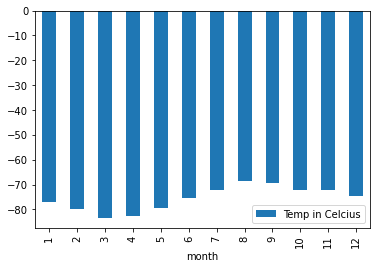

In [37]:
# Plot the average temperature by month
avg_low_temp.plot(kind='bar', y='min_temp', x='month', label = 'Temp in Celcius')

In [38]:
# Identify the coldest and hottest months in Curiosity's location
months_max_temps =mars_df.groupby('month')['min_temp'].max()
months_min_temps =mars_df.groupby('month')['min_temp'].min()
print('Month Max Temps')
print(max(months_max_temps))
print('Month Min Temps')
print(max(months_min_temps))

Month Max Temps
-62.0
Month Min Temps
-75.0


In [39]:
# Identify the coldest and hottest day in Curiosity's location
hottest_day = mars_df[mars_df.min_temp == mars_df.min_temp.max()]
coldest_day = mars_df[mars_df.min_temp == mars_df.min_temp.min()]

# Print the 'min_temp' value of the hottest_day and coldest_day
print(hottest_day['min_temp'].values[0])
print(coldest_day['min_temp'].values[0])

-62.0
-90.0


In [40]:
#Average pressure by Martian month
avg_press = mars_df.groupby('month', as_index=False)['pressure'].mean()
avg_press

,month,pressure
0,1,862.488506
1,2,889.455056
2,3,877.322917
3,4,806.329897
4,5,748.557047
5,6,745.054422
6,7,795.105634
7,8,873.829787
8,9,913.305970
9,10,887.312500


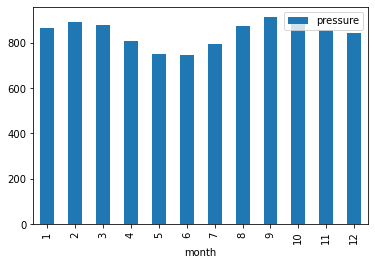

In [41]:
# Plot the average pressure by month
avg_press.plot(kind='bar', y='pressure', x='month')

In [ ]:
# Write the data to a CSV
mars_df.to_csv('Resources/mars_df.csv')